In [40]:
# Kaggle - Titanic
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [42]:
# extract title from the name
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Lady', 'Rev', 'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Sir', 'Mme', 'Countess', 'Don', 'Dona', 'Jonkheer']

df_train['Title'] = df_train['Name'].map(lambda x: substrings_in_string(x, title_list))

# replacing all titles with mr, officer, royalty, mrs, miss and master
def replace_titles(x):
    title = x['Title']
    if title in ['Mr']:
        return 'Mr'
    elif title in ['Major', 'Capt', 'Col', 'Rev', 'Dr']:
        return 'Officer'
    elif title in ['Don', 'Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady']:
        return 'Royalty'
    elif title in ['Mrs', 'Ms', 'Mme']:
        return 'Mrs'
    elif title in ['Miss', 'Mlle']:
        return 'Miss'
    elif title in ['Master']:
        return 'Master'
    else:
        return title
    
df_train['Title'] = df_train.apply(replace_titles, axis = 1)

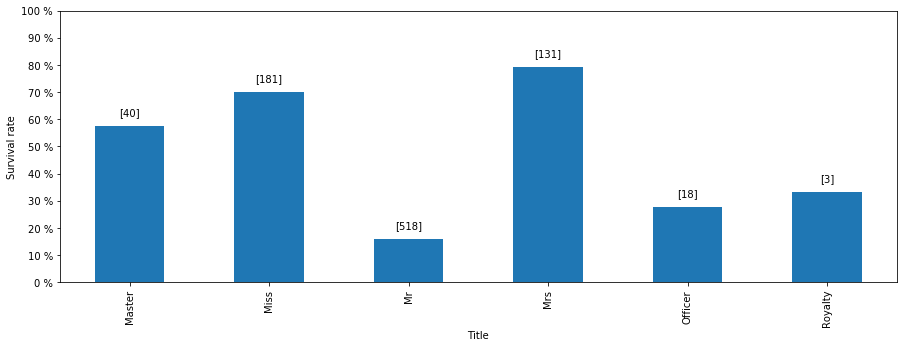

In [43]:
figure = plt.figure(figsize = (15, 5))

df_train.groupby('Title').mean()['Survived'].plot(kind = 'bar')

X = np.arange(6)
Y = np.array(df_train.groupby('Title').mean()['Survived'].fillna(0))
Z = np.array(pd.DataFrame(df_train['Title'].value_counts()).sort_index(ascending = True))

ax = plt.gca()

for a, b, c in zip(X, Y, Z): 
    plt.text(a, b + 0.05, str(c), ha = 'center', va = 'center')

plt.ylim(0, 1)
yticks_major = np.round(np.linspace(0, 1, 11), 1)
yticks_major_str = (yticks_major * 100).astype(int).astype(str).tolist()
yticks_labels = [x + ' %' for x in yticks_major_str]
ax.set_yticks(yticks_major)
ax.set_yticklabels(yticks_labels, fontsize = 10)

plt.xlabel('Title')
plt.ylabel('Survival rate')
plt.show()

* Mrs and Miss (women) have higher survival rates than most other titles, Master (kids) have a relatively high survival rate too

In [44]:
df_train.groupby('Title').mean()['Survived']

Title
Master     0.575000
Miss       0.701657
Mr         0.158301
Mrs        0.793893
Officer    0.277778
Royalty    0.333333
Name: Survived, dtype: float64

In [45]:
df_train['Age'].value_counts(dropna = False).head()

NaN      177
 24.0     30
 22.0     27
 18.0     26
 28.0     25
Name: Age, dtype: int64

In [46]:
# average age split by Sex, Pclass and Title
df_train[['Sex', 'Pclass', 'Title', 'Age']].groupby(['Sex', 'Pclass', 'Title']).mean()

Age
Sex    Pclass Title             
female 1      Miss     29.869565
              Mrs      40.162162
              Officer  49.000000
              Royalty  33.000000
       2      Miss     22.450000
              Mrs      33.000000
       3      Miss     16.123188
              Mrs      33.515152
male   1      Master    5.306667
              Mr       41.664773
              Officer  51.125000
              Royalty  39.000000
       2      Master    2.258889
              Mr       32.768293
              Officer  42.000000
       3      Master    5.350833
              Mr       28.724891

In [47]:
# 177 missings are filled by the mean per Sex, Pclass and Title

# impute age with the mean of the groups
df_train['Age'].fillna(-1, inplace = True)

grouped_means = df_train.groupby(['Sex', 'Pclass', 'Title']).Age.mean().to_frame().reset_index()

genders = df_train['Sex'].unique()
pclasses = df_train['Pclass'].unique()
titles = df_train['Title'].unique()

for index, row in df_train.iterrows():
    if row['Age'] == -1:
        for gender in genders:
            for pclass in pclasses:
                for title in titles:
                    if ((row['Sex'] == gender) &
                        (row['Pclass'] == pclass) &
                        (row['Title'] == title)):

                        mean = grouped_means[(grouped_means['Sex'] == gender) &
                                                 (grouped_means['Pclass'] == pclass) &
                                                 (grouped_means['Title'] == title)]
                        df_train.loc[index, 'Age'] = mean['Age'].values[0]

In [48]:
df_train['Age'].value_counts(dropna = False)

20.338558    90
10.583333    33
24.000000    30
22.000000    27
18.000000    26
28.000000    25
19.000000    25
30.000000    25
21.000000    24
25.000000    23
36.000000    22
29.000000    20
33.763889    20
26.000000    18
32.000000    18
35.000000    18
27.000000    18
31.000000    17
16.000000    17
20.000000    15
34.000000    15
23.000000    15
33.000000    15
39.000000    14
17.000000    13
40.000000    13
42.000000    13
45.000000    12
38.000000    11
4.000000     10
             ..
0.750000      2
13.000000     2
64.000000     2
28.500000     2
63.000000     2
45.500000     2
40.500000     2
20.984375     2
0.830000      2
32.500000     2
55.000000     2
59.000000     2
45.333333     1
29.212766     1
66.000000     1
0.420000      1
70.500000     1
0.670000      1
74.000000     1
14.500000     1
36.500000     1
55.500000     1
0.920000      1
20.500000     1
23.500000     1
53.000000     1
80.000000     1
24.500000     1
34.500000     1
12.000000     1
Name: Age, Length: 98, d

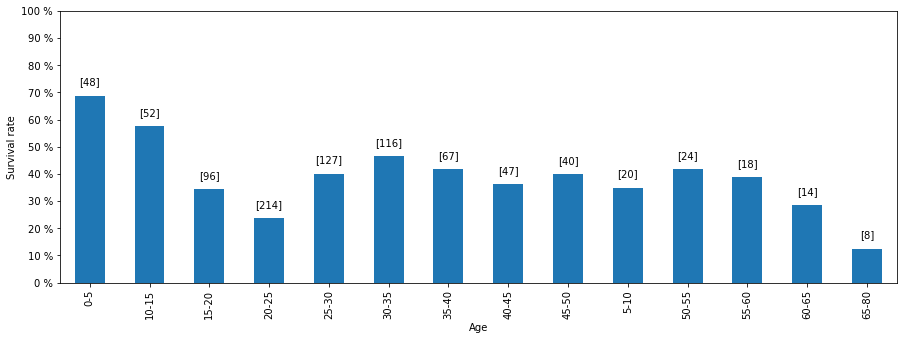

In [49]:
figure = plt.figure(figsize = (15, 5))

df_train['Age bins'] = pd.cut(df_train['Age'],
                              bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 80],
                              labels = [  '0-5',  '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40',
                                        '40-45', '45-50', '50-55', '55-60', '60-65', '65-80'])
df_train.groupby('Age bins').mean()['Survived'].plot(kind = 'bar')

X = np.arange(14)
Y = np.array(df_train.groupby('Age bins').mean()['Survived'].fillna(0))
Z = np.array(pd.DataFrame(df_train['Age bins'].value_counts()).sort_index(ascending = True))

ax = plt.gca()

for a, b, c in zip(X, Y, Z): 
    plt.text(a, b + 0.05, str(c), ha = 'center', va = 'center')

plt.ylim(0, 1)

yticks_major = np.round(np.linspace(0, 1, 11), 1)
yticks_major_str = (yticks_major * 100).astype(int).astype(str).tolist()
yticks_labels = [x + ' %' for x in yticks_major_str]
ax.set_yticks(yticks_major)
ax.set_yticklabels(yticks_labels, fontsize = 10)

plt.xlabel('Age')
plt.ylabel('Survival rate')
plt.show()

* young passengers have a higher survival rate than the other passengers

In [50]:
# create a dummy for children
df_train['Children'] = np.where(df_train['Age'] <= 15, 1, 0)

In [51]:
df_train['Children'].value_counts(dropna = False)

0    771
1    120
Name: Children, dtype: int64

In [52]:
# port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
df_train.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [53]:
# fill missings in Embarked, S is the most common value amongst the non-missings
df_train.Embarked.fillna('S', inplace = True)

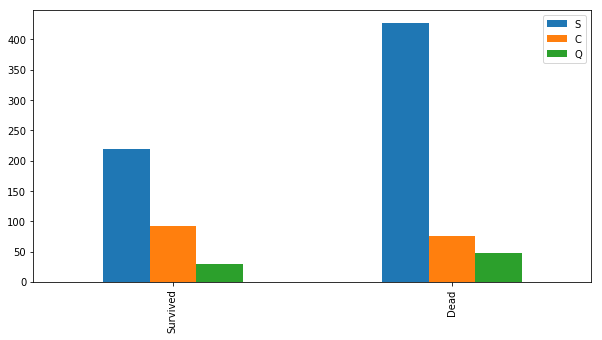

In [54]:
survived_embarked = df_train[df_train['Survived'] == 1]['Embarked'].value_counts()
dead_embarked = df_train[df_train['Survived'] == 0]['Embarked'].value_counts()

df = pd.DataFrame([survived_embarked, dead_embarked])
df.index = ['Survived', 'Dead']

df.plot(kind = 'bar', figsize = (10, 5))
plt.show()

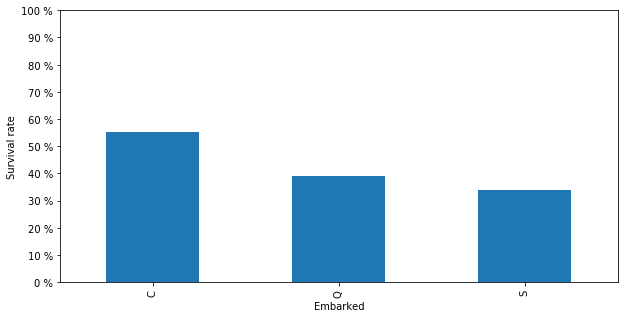

In [55]:
df_train.groupby('Embarked').mean()['Survived'].plot(kind = 'bar', figsize = (10, 5))

ax = plt.gca()
plt.ylim(0, 1)

yticks_major = np.round(np.linspace(0, 1, 11), 1)
yticks_major_str = (yticks_major * 100).astype(int).astype(str).tolist()
yticks_labels = [x + ' %' for x in yticks_major_str]
ax.set_yticks(yticks_major)
ax.set_yticklabels(yticks_labels, fontsize = 10)

plt.xlabel('Embarked')
plt.ylabel('Survival rate')

plt.show()

* passengers who embarked in Cherbourg have a higher survival rate than the other passengers

In [56]:
# fill the missings in Cabin with 'U' (unknown)
df_train['Cabin'].fillna('U', inplace = True)
df_train['Cabin'] = df_train['Cabin'].map(lambda c : c[0])
df_train['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

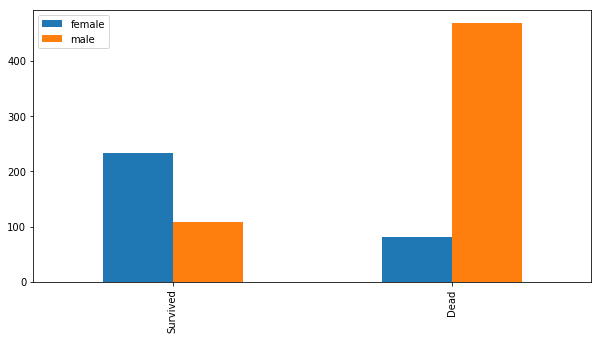

In [57]:
survived_sex = df_train[df_train['Survived'] == 1]['Sex'].value_counts()
dead_sex = df_train[df_train['Survived'] == 0]['Sex'].value_counts()

df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']

df.plot(kind = 'bar', figsize = (10,5))
plt.show()

* women are more likely to survive than men

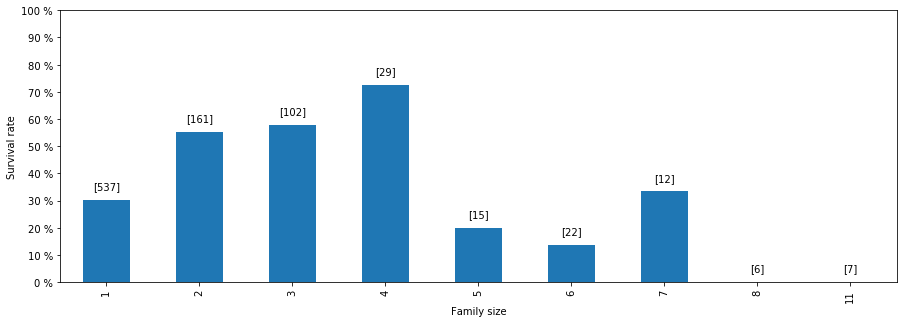

In [58]:
# create a new feature: family_size = number of siblings / spouses aboard + number of parents / children aboard the Titanic
df_train['Family size'] = df_train['SibSp'] + df_train['Parch'] + 1

figure = plt.figure(figsize = (15, 5))

df_train.groupby('Family size').mean()['Survived'].plot(kind = 'bar')
df_train['Family size'].value_counts()

X = np.arange(9)
Y = np.array(df_train.groupby('Family size').mean()['Survived'].fillna(0))
Z = np.array(pd.DataFrame(df_train['Family size'].value_counts()).sort_index(ascending = True))

ax = plt.gca()

X, Y, Z
for a, b, c in zip(X, Y, Z): 
    plt.text(a, b + 0.05, str(c), ha = 'center', va = 'center')

plt.ylim(0, 1)

yticks_major = np.round(np.linspace(0, 1, 11), 1)
yticks_major_str = (yticks_major * 100).astype(int).astype(str).tolist()
yticks_labels = [x + ' %' for x in yticks_major_str]
ax.set_yticks(yticks_major)
ax.set_yticklabels(yticks_labels, fontsize = 10)

plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.show()

* families of 2-4 have higher survival rates

In [59]:
# create a new feature: fare per person
df_train['Fare per person'] = df_train['Fare'] / df_train['Family size']

# create dummies based on family size
df_train["Family small"] = (df_train["Family size"] == 1).astype(int)
df_train["Family medium"] = ((df_train["Family size"] >= 2) & (df_train["Family size"] <= 4)).astype(int)
df_train["Family large"] = (df_train["Family size"] >= 5).astype(int)

# convert Sex to integer
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})

# convert categorical features into dummies
feature_to_be_splitted = ['Embarked', 'Cabin', 'Title']
df_train = pd.get_dummies(df_train, columns = feature_to_be_splitted)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 35 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null int64
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Age bins           891 non-null category
Children           891 non-null int32
Family size        891 non-null int64
Fare per person    891 non-null float64
Family small       891 non-null int32
Family medium      891 non-null int32
Family large       891 non-null int32
Embarked_C         891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
Cabin_A            891 non-null uint8
Cabin_B            891 non-null uint8
Cabin_C            891 non-null uint8
Cabin_D   

In [60]:
# Name, Ticket, Cabin and Age bins are considered irrelevant, so let's remove them from the dataset
df_train.drop(['Name', 'Ticket', 'Age bins'], axis = 1, inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Children,Family size,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,1,22.0,1,0,7.2500,0,2,...,0,0,0,1,0,0,1,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,0,2,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1,...,0,0,0,1,0,1,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,2,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,1,...,0,0,0,1,0,0,1,0,0,0


In [61]:
df_train.set_index('PassengerId', inplace = True)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 31 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null int64
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null float64
Children           891 non-null int32
Family size        891 non-null int64
Fare per person    891 non-null float64
Family small       891 non-null int32
Family medium      891 non-null int32
Family large       891 non-null int32
Embarked_C         891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
Cabin_A            891 non-null uint8
Cabin_B            891 non-null uint8
Cabin_C            891 non-null uint8
Cabin_D            891 non-null uint8
Cabin_E            891 non-null uint8
Cabin_F            891 non-null uint8
Cabin_G            891 non-null uint8
Cabin_T        

Let's explore the importance of the features:

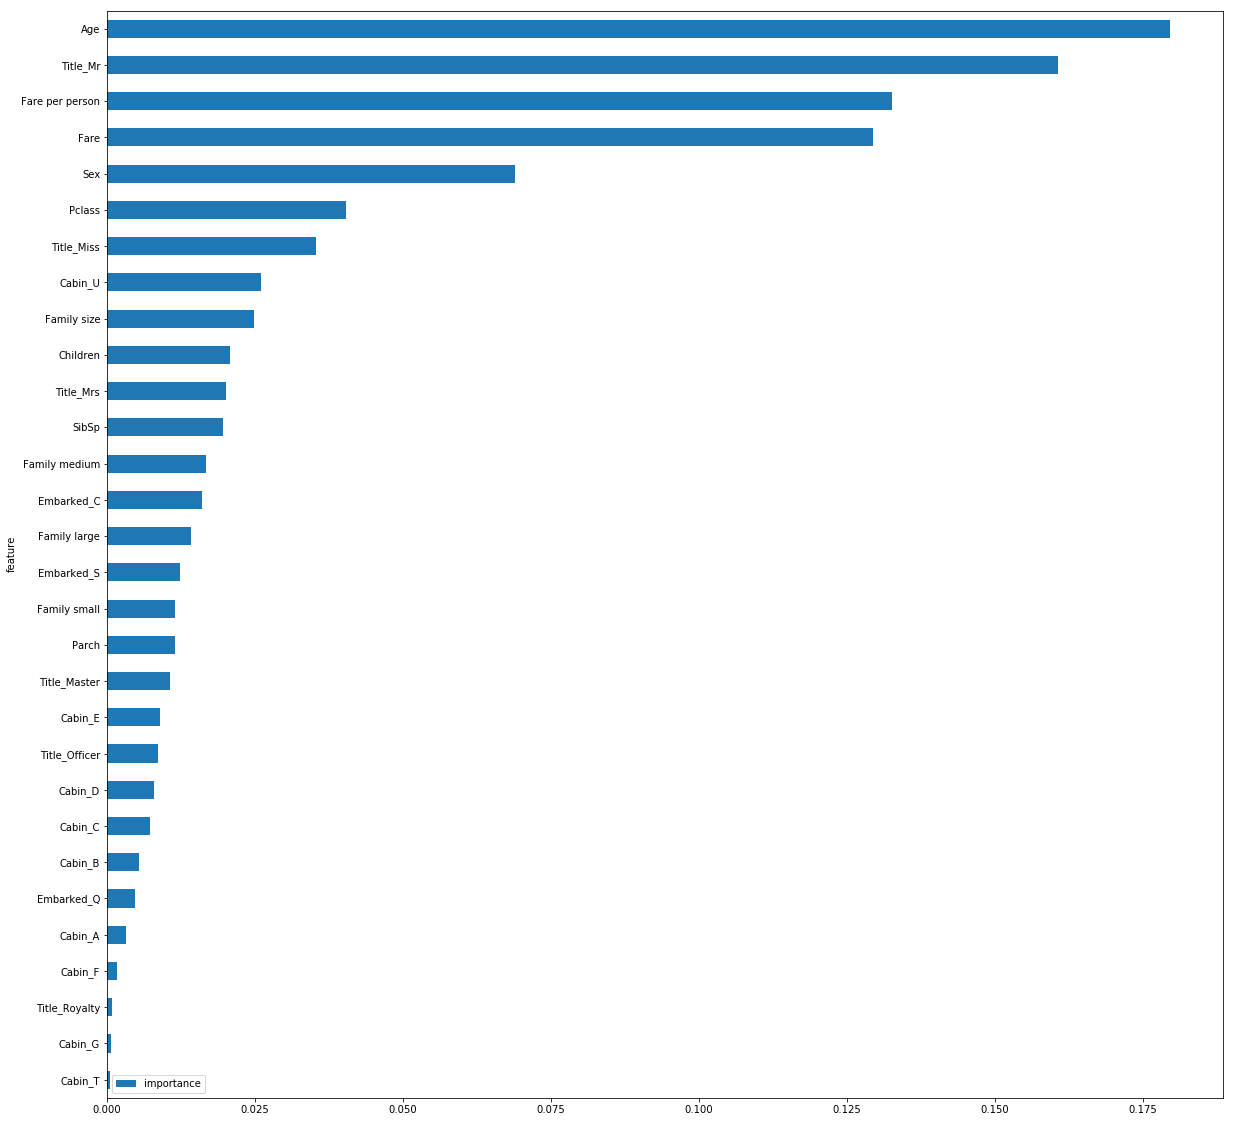

In [63]:
from sklearn.ensemble import RandomForestClassifier

x = df_train.drop('Survived', axis = 1)
y = df_train.Survived

clf = RandomForestClassifier().fit(x, y)

features = []

for feature, importance in zip(x.columns, clf.feature_importances_):
    features.append((importance, feature))

features.sort(reverse = True)
features_relevant = [x[1] for x in features if x[0] > 0]

features = pd.DataFrame()

features['feature'] = x.columns
features['importance'] = clf.feature_importances_

features.sort_values(by = ['importance'], ascending = True, inplace = True)
features.set_index('feature', inplace = True)
features.plot(kind = 'barh', figsize = (20, 20))
plt.show()

In [64]:
# remove 'Cabin_T' because it's not present in the test set
features_relevant.pop(-1)
features_relevant

['Age',
 'Title_Mr',
 'Fare per person',
 'Fare',
 'Sex',
 'Pclass',
 'Title_Miss',
 'Cabin_U',
 'Family size',
 'Children',
 'Title_Mrs',
 'SibSp',
 'Family medium',
 'Embarked_C',
 'Family large',
 'Embarked_S',
 'Family small',
 'Parch',
 'Title_Master',
 'Cabin_E',
 'Title_Officer',
 'Cabin_D',
 'Cabin_C',
 'Cabin_B',
 'Embarked_Q',
 'Cabin_A',
 'Cabin_F',
 'Title_Royalty',
 'Cabin_G']

Let's train a model based on a gridsearch:

In [76]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
clf_RF = RandomForestClassifier()

# define the parameters for the gridsearch
grid_values = {
               'max_depth': [4, 5, 6],
               'min_samples_leaf': [2, 3, 4],
               'bootstrap': [True, False],
               'n_estimators': [1500]
              }

# default metric to optimize over grid parameters: accuracy
grid_clf_RF_acc = GridSearchCV(clf_RF, param_grid = grid_values)
grid_clf_RF_acc.fit(x[features_relevant], y)

print('Grid best parameter (max. accuracy): ', grid_clf_RF_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_RF_acc.best_score_)

Grid best parameter (max. accuracy):  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 1500}
Grid best score (accuracy):  0.83164983165


In [77]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [78]:
scores_RF = []
for params, train, test in zip(grid_clf_RF_acc.cv_results_['params'],
                               list(grid_clf_RF_acc.cv_results_['mean_train_score']),
                               list(grid_clf_RF_acc.cv_results_['mean_test_score'])):
    scores_RF.append((params, train, test))
scores_RF

[({'bootstrap': True,
   'max_depth': 4,
   'min_samples_leaf': 2,
   'n_estimators': 1500},
  0.84511784511784516,
  0.82940516273849607),
 ({'bootstrap': True,
   'max_depth': 4,
   'min_samples_leaf': 3,
   'n_estimators': 1500},
  0.8456790123456791,
  0.82940516273849607),
 ({'bootstrap': True,
   'max_depth': 4,
   'min_samples_leaf': 4,
   'n_estimators': 1500},
  0.84511784511784516,
  0.82828282828282829),
 ({'bootstrap': True,
   'max_depth': 5,
   'min_samples_leaf': 2,
   'n_estimators': 1500},
  0.86026936026936018,
  0.8271604938271605),
 ({'bootstrap': True,
   'max_depth': 5,
   'min_samples_leaf': 3,
   'n_estimators': 1500},
  0.85802469135802462,
  0.83164983164983164),
 ({'bootstrap': True,
   'max_depth': 5,
   'min_samples_leaf': 4,
   'n_estimators': 1500},
  0.85690235690235683,
  0.82491582491582494),
 ({'bootstrap': True,
   'max_depth': 6,
   'min_samples_leaf': 2,
   'n_estimators': 1500},
  0.87934904601571284,
  0.83052749719416386),
 ({'bootstrap': True,


* best model is a random forest with bootstrap = True, max_depth = 5, min_samples_leaf = 3 and n_estimators = 1500

In [79]:
df_test = pd.read_csv('data/test.csv')

# create title
df_test['Title'] = df_test['Name'].map(lambda x: substrings_in_string(x, title_list))
df_test['Title'] = df_test.apply(replace_titles, axis = 1)

# imputation of fare
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

# create family size
df_test['Family size'] = df_test['SibSp'] + df_test['Parch'] + 1

# create a new feature: fare per person
df_test['Fare per person'] = df_test['Fare'] / df_test['Family size']

# create dummies based on family size
df_test["Family small"] = (df_test["Family size"] == 1).astype(int)
df_test["Family medium"] = ((df_test["Family size"] >= 2) & (df_test["Family size"] <= 4)).astype(int)
df_test["Family large"] = (df_test["Family size"] >= 5).astype(int)

# fill the missings in Cabin with 'U' (unknown)
df_test['Cabin'].fillna('U', inplace = True)
df_test['Cabin'] = df_test['Cabin'].map(lambda c : c[0])

# Name, Ticket and Cabin are considered irrelevant, so let's remove it from the dataset
df_test.drop(['Name', 'Ticket'], axis = 1, inplace = True)

df_test.set_index('PassengerId', inplace = True)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 15 columns):
Pclass             418 non-null int64
Sex                418 non-null object
Age                332 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Fare               418 non-null float64
Cabin              418 non-null object
Embarked           418 non-null object
Survived           418 non-null int64
Title              418 non-null object
Family size        418 non-null int64
Fare per person    418 non-null float64
Family small       418 non-null int32
Family medium      418 non-null int32
Family large       418 non-null int32
dtypes: float64(3), int32(3), int64(5), object(4)
memory usage: 47.4+ KB


In [80]:
# impute age with the mean of the groups based on the training data
df_test['Age'].fillna(-1, inplace = True)

genders = df_test['Sex'].unique()
pclasses = df_test['Pclass'].unique()
titles = df_test['Title'].unique()

for index, row in df_test.iterrows():
    if row['Age'] == -1:
        for gender in genders:
            for pclass in pclasses:
                for title in titles:
                    if ((row['Sex'] == gender) &
                        (row['Pclass'] == pclass) &
                        (row['Title'] == title)):

                        mean = grouped_means[(grouped_means['Sex'] == gender) &
                                             (grouped_means['Pclass'] == pclass) &
                                             (grouped_means['Title'] == title)]
                        df_test.loc[index, 'Age'] = mean['Age'].values[0]

In [81]:
df_test['Age'].value_counts(dropna = False)

20.338558    46
21.000000    17
24.000000    17
22.000000    16
30.000000    15
10.583333    14
18.000000    13
27.000000    12
26.000000    12
25.000000    11
23.000000    11
29.000000    10
36.000000     9
45.000000     9
26.119048     8
20.000000     8
33.000000     7
33.763889     7
17.000000     7
28.000000     7
55.000000     6
32.000000     6
31.000000     6
39.000000     6
50.000000     5
48.000000     5
42.000000     5
47.000000     5
41.000000     5
40.000000     5
             ..
63.000000     2
2.000000      2
54.000000     2
22.500000     1
62.000000     1
76.000000     1
28.500000     1
67.000000     1
0.830000      1
0.920000      1
0.170000      1
38.500000     1
3.000000      1
51.000000     1
5.000000      1
44.000000     1
14.500000     1
59.000000     1
58.000000     1
0.330000      1
0.750000      1
36.500000     1
40.500000     1
11.500000     1
34.000000     1
15.000000     1
7.000000      1
60.500000     1
26.500000     1
34.500000     1
Name: Age, Length: 86, d

In [82]:
# create a dummy for children
df_test['Children'] = np.where(df_test['Age'] <= 15, 1, 0)

In [83]:
# convert Sex to integer
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

# convert categorical features into dummies
df_test = pd.get_dummies(df_test, columns = feature_to_be_splitted)

In [84]:
x_test = df_test[features_relevant]

In [85]:
clf_RF = RandomForestClassifier(max_depth = 5, min_samples_leaf = 3, n_estimators = 1500, bootstrap = True).fit(x[features_relevant], y)
df_test['y_pred'] = clf_RF.predict(x_test)